In [1]:
!TZ=US/Eastern date

Tue Jun 25 22:27:07 EDT 2024


In [2]:
!pwd
!echo $CONDA_PREFIX
!python -V

/ocean/projects/cis240078p/shared/analysis/D2
/opt/packages/anaconda3-2022.10
Python 3.9.13


In [3]:
import os
PD = os.environ['SHARED']

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
INPUT_FILE1 = PD + '/data/Maybridge_HitDiscover.smiles.unique.v2.csv'
INPUT_FILE2 = 'maybridge.predictions.by.D2.models.all.batch'

OUTPUT_FILE1 = 'maybridge.predictions.by.D2.models.all.csv'
OUTPUT_FILE2 = 'maybridge.predictions.by.D2.models.all.hist.png'

In [5]:
metadata = pd.read_csv(INPUT_FILE1, index_col=0)
metadata

,Code,SMILES
0,AC10018,FC1=CC=C(C=C1)C(C2=CC=C(F)C=C2)N3CCNCC3
1,AC12157,NC1=NC(N=CN2)=C2C(SC)=N1
2,AC13917,CN(C)CC1=CNC2=C1C=C(C=C2)OCC3=CC=CC=C3
3,AC27191,O=C(O)C1=CC=C(Br)O1
4,AC29806,O=C(O)C(N)CC1=CNC2=C1C=C(Br)C=C2
...,...,...
51770,S14814,O=[N+]([O-])C1=C(O/N=C(C)/OCC)C=CC([N+]([O-])=...
51771,S14839,O=C(N1OC2=CC=C([N+]([O-])=O)C([N+]([O-])=O)=C2...
51772,S14896,O=[N+]([O-])C1=CC=C2N=C(C3=CC=CC=C3)C(C4=CC=CC...
51773,SPB05721,CC(N1)=C(C(OCC)=O)C(/C=C/C2=CC=CC=C2)C(C(OCC)=...


In [6]:
!ls *.csv | wc

    128     128    6546


In [7]:
pred = []
for i in range(128):
    pred.append(pd.read_csv(INPUT_FILE2+str(i)+'.csv'))

In [8]:
len(pred), set([x.shape for x in pred])

(128, {(248, 7), (400, 7)})

In [9]:
pred = pd.concat(pred, axis=0).reset_index(drop=True)
pred

,Ligand,CNN_AAC,CNN_CNN,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer
0,AC10018,4.627549,4.774322,3.331726,3.091078,3.572538,6.156160
1,AC12157,4.043609,4.908232,3.458484,3.319531,3.507584,4.475867
2,AC13917,4.613088,6.120453,3.300838,3.459638,4.201146,6.278967
3,AC27191,3.382649,3.793432,3.287986,3.202407,3.149206,5.465470
4,AC29806,4.524927,5.175406,3.280077,3.765224,4.206127,8.287905
...,...,...,...,...,...,...,...
51043,S14814,4.880979,6.479657,3.638082,2.397767,4.421041,6.958442
51044,S14839,4.657235,7.445328,5.475270,3.598124,4.390774,7.824915
51045,S14896,5.164877,6.176061,4.669076,3.510098,5.279627,5.118299
51046,SPB05721,5.118765,4.731164,4.820868,5.009302,4.969163,7.023477


In [10]:
all([x == y for x,y in zip(pred.Ligand, metadata.Code)])

True

In [11]:
pred.drop(['Ligand'], axis=1).corr().round(3)

,CNN_AAC,CNN_CNN,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer
CNN_AAC,1.000,0.255,0.181,0.052,0.076,0.119
CNN_CNN,0.255,1.000,0.153,0.007,0.066,0.096
Daylight_CNN,0.181,0.153,1.000,0.113,0.180,0.190
MPNN_AAC,0.052,0.007,0.113,1.000,0.356,0.142
MPNN_CNN,0.076,0.066,0.180,0.356,1.000,0.331
MPNN_Transformer,0.119,0.096,0.190,0.142,0.331,1.000


In [12]:
pred.insert(pred.shape[1], column='Mean', value=pred.drop(['Ligand'], axis=1).mean(1))
pred

,Ligand,CNN_AAC,CNN_CNN,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer,Mean
0,AC10018,4.627549,4.774322,3.331726,3.091078,3.572538,6.156160,4.258896
1,AC12157,4.043609,4.908232,3.458484,3.319531,3.507584,4.475867,3.952218
2,AC13917,4.613088,6.120453,3.300838,3.459638,4.201146,6.278967,4.662355
3,AC27191,3.382649,3.793432,3.287986,3.202407,3.149206,5.465470,3.713525
4,AC29806,4.524927,5.175406,3.280077,3.765224,4.206127,8.287905,4.873278
...,...,...,...,...,...,...,...,...
51043,S14814,4.880979,6.479657,3.638082,2.397767,4.421041,6.958442,4.795994
51044,S14839,4.657235,7.445328,5.475270,3.598124,4.390774,7.824915,5.565274
51045,S14896,5.164877,6.176061,4.669076,3.510098,5.279627,5.118299,4.986340
51046,SPB05721,5.118765,4.731164,4.820868,5.009302,4.969163,7.023477,5.278790


In [13]:
pred.to_csv(OUTPUT_FILE1, index=None)

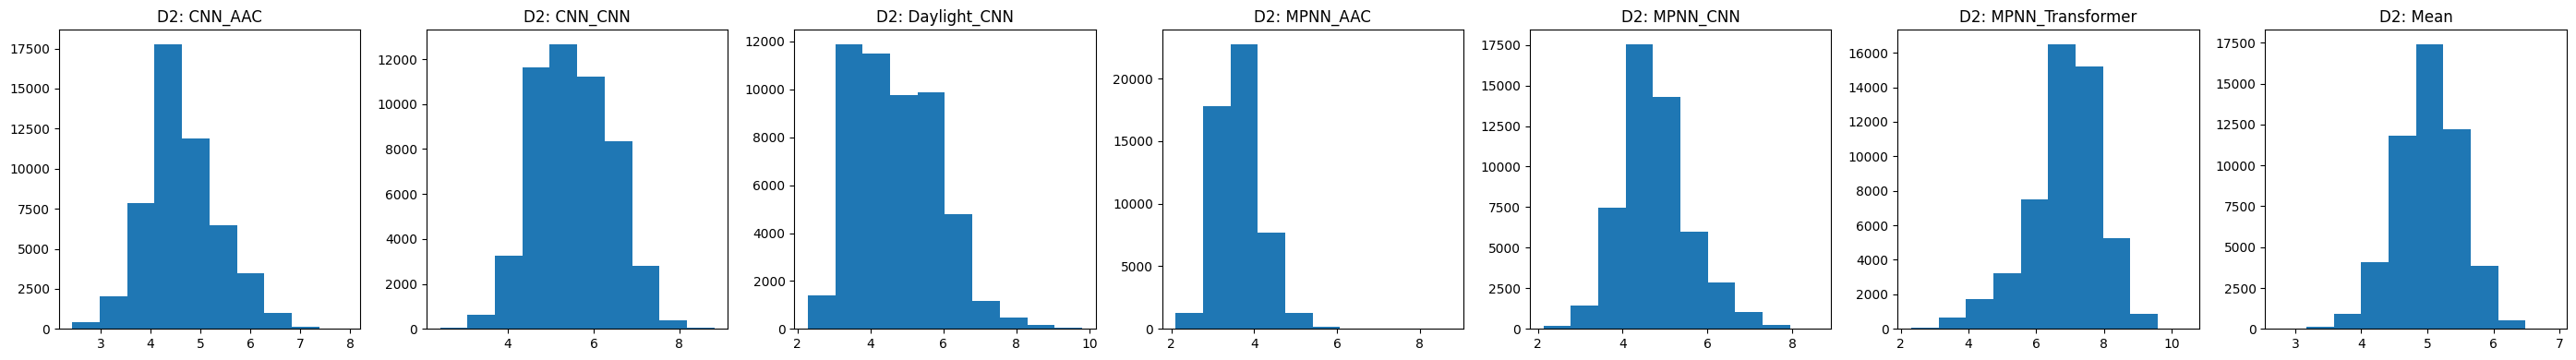

In [14]:
fig,ax = plt.subplots(1,7, figsize=(4*7,4))

[pred[x].hist(ax=ax[i], grid=False).set_title('D2: '+x) for i,x in enumerate(pred.columns[1:])]
fig.tight_layout()

fig.savefig(OUTPUT_FILE2)

In [15]:
!TZ=US/Eastern date

Tue Jun 25 22:27:25 EDT 2024
